# ***Proyek Analisis Data : Bike Sharing***



- **Nama        : Fadzli Muhammad**
- **Email       : fadmuh12@gmail.com**
- **ID Dicoding : fadzli_m**


## Menentukan Pertanyaan Bisnis

 #### 1. Apakah ada korelasi antara kondisi cuaca (weathersit) dengan jumlah penyewaan sepeda ?
 #### 2. Bagaimana perbandingan penyewaan sepeda antara hari kerja dan hari libur dalam setahun ?
 #### 3. Apakah ada perbedaan dalam pola penggunaan sepeda antara pengguna casual dan terdaftar ?

## Mengimport Library yang dibutuhkan



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## **Data Wrangling**


### ***Data Gathering***

- ### Inisialisasi Variabel

In [2]:
# Direktori yang berisi file CSV
data_path = "data/"

# Membuka dataset
df_day = pd.read_csv(data_path + "day.csv")
df_hour = pd.read_csv(data_path + "hour.csv")

data = {
    "day": df_day,
    "hour": df_hour}


- ### Menampilkan Tabel hour

In [3]:
# Menampilkan 5 data teratas hour.csv
data['hour'].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- ### Menampilkan Tabel day

In [4]:
# Menampilkan 5 data teratas day.csv
data['day'].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### ***Assessing Data***

- ### Melihat Informasi Pada Tabel

In [5]:
data['hour'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
data['day'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan data di atas, dapat disimpulkan bahwa pada kolom dteday pada masing - masing tabel memiliki tipe data yang tidak sesuai, yaitu object. Hal ini harus diperbaiki dengan mengubah tipe datanya menjadi tipe data yang sesuai, yaitu datetime

- ### Men-check Missing Value Pada Tiap Tabel


In [7]:
data['hour'].isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data['day'].isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- ### Men-check Duplikasi Pada Tiap Tabel

In [9]:
print("Jumlah data duplikat pada tabel hour: ", df_hour.duplicated().sum())
print("\nJumlah data duplikat pada tabel day: ", df_day.duplicated().sum())
 

Jumlah data duplikat pada tabel hour:  0

Jumlah data duplikat pada tabel day:  0


Tidak terdapat duplikasi pada kedua tabel

- ### Men-check Statistik Deskriptif Data Pada Setiap Tabel

In [10]:
data['hour'].describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
data['day'].describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan informasi di atas, dapat disimpulkan bahwa pada kedua tabel tersebut tidak terdapat duplikasi dan persebaran datanya sudah cukup bagus. Yang hanya kita perlu lakukan adalah mengubah tipe data pada kolom dteday yang awalnya adalah object menjadi dtime.

### ***Cleaning Data***

- ### Mengubah Tipe Data 

Setelah melakukan assessing data, selanjutnya kita akan masuk ke dalam tahap cleaning data. Kita telah mengetahui bahwa tidak terdapat duplikasi dan persebaran datanya yang sudah merata. Namun, terdapat kolom tabel, yaitu dteday yang memiliki tipe data object. Pada tahap ini, kita akan mengubah tipe datanya menjadi tipe data yang relevan, yaitu datetime

In [12]:
datetime_columns = ['dteday']

for column in datetime_columns:
    data['hour'][column] = pd.to_datetime(data['hour'][column])
    
data['hour'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [13]:
datetime_columns = ['dteday']

for column in datetime_columns:
    data['day'][column] = pd.to_datetime(data['day'][column])
    
data['day'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dapat dilihat bahwa tipe data pada masing - masing kolom dteday telah berubah menjadi tipe data yang sesuai, yaitu datetime.

Karena pada tahap cleaning data hanya mengubah tipe data menjadi tipe data yang relevan, maka selanjutnya kita akan masuk ke dalam tahap Exploratory Data Analysis

## **Exploratory Data Analysis (EDA)**


### ***Eksplor Data Kedua Tabel***

Pada tahapan ini, kita akan mengeksplor tabel hour dan tabel day yang mana memiliki kolom - kolom yang sama, antara lain: instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atempt, hum, windspeed, casual, registred, cnt.

In [14]:
data['hour'].describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [15]:
data['day'].describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
all_df = pd.merge(
    left = data['hour'],
    right = data['day'],
    how="left",
    left_on=["dteday", "instant"],
    right_on=["dteday", "instant"]
)

print(all_df.head())

   instant     dteday  season_x  yr_x  mnth_x  hr  holiday_x  weekday_x  \
0        1 2011-01-01         1     0       1   0          0          6   
1        2 2011-01-01         1     0       1   1          0          6   
2        3 2011-01-01         1     0       1   2          0          6   
3        4 2011-01-01         1     0       1   3          0          6   
4        5 2011-01-01         1     0       1   4          0          6   

   workingday_x  weathersit_x  ...  weekday_y  workingday_y  weathersit_y  \
0             0             1  ...        6.0           0.0           2.0   
1             0             1  ...        NaN           NaN           NaN   
2             0             1  ...        NaN           NaN           NaN   
3             0             1  ...        NaN           NaN           NaN   
4             0             1  ...        NaN           NaN           NaN   

     temp_y   atemp_y     hum_y  windspeed_y  casual_y  registered_y  cnt_y  
0  0.344

- Melihat Penggunaan Sepeda (Casual dan Registered) per Bulan Dalam 1 Tahun 

In [17]:
monthly_hour_rent = all_df.groupby('mnth_x')['cnt_x'].sum().reset_index()

print(monthly_hour_rent)

    mnth_x   cnt_x
0        1  134933
1        2  151352
2        3  228920
3        4  269094
4        5  331686
5        6  346342
6        7  344948
7        8  351194
8        9  345991
9       10  322352
10      11  254831
11      12  211036


- Melihat Penggunaan Sepeda (Casual dan Registered) per Hari Dalam 1 Tahun 

In [18]:
monthly_day_rent = all_df.groupby('mnth_y').mean().reset_index()

print(monthly_day_rent)

   mnth_y  instant     dteday  season_x  yr_x  mnth_x   hr  holiday_x  \
0     1.0      1.0 2011-01-01       1.0   0.0     1.0  0.0        0.0   

   weekday_x  workingday_x  ...  weekday_y  workingday_y  weathersit_y  \
0        6.0           0.0  ...        6.0           0.0           2.0   

     temp_y   atemp_y     hum_y  windspeed_y  casual_y  registered_y  cnt_y  
0  0.344167  0.363625  0.805833     0.160446     331.0         654.0  985.0  

[1 rows x 31 columns]


- Menghitung rata-rata penyewaan sepeda per jam untuk setiap hari dalam seminggu.

In [19]:
hour_avg_rent = all_df.groupby(['weekday_x', 'hr'])['cnt_x'].mean().reset_index()
print(hour_avg_rent)


     weekday_x  hr       cnt_x
0            0   0   93.990385
1            0   1   77.432692
2            0   2   61.627451
3            0   3   31.144231
4            0   4    9.362745
..         ...  ..         ...
163          6  19  239.932692
164          6  20  180.865385
165          6  21  156.000000
166          6  22  139.663462
167          6  23  115.855769

[168 rows x 3 columns]


- Menghitung rata-rata jumlah penyewaan sepeda berdasarkan musim.

In [20]:
rent_season = all_df.groupby('season_x')['cnt_x'].mean().reset_index()
print(rent_season)

   season_x       cnt_x
0         1  111.114569
1         2  208.344069
2         3  236.016237
3         4  198.868856


- Menghitung perbedaan dalam jumlah rata-rata penyewaan sepeda antara hari kerja dan hari libur pada setiap jam dalam sehari.

In [21]:
rent_diff = all_df.groupby(['workingday_x', 'hr'])['cnt_x'].mean().unstack()
print(rent_diff)


hr                  0          1          2          3         4          5   \
workingday_x                                                                   
0             90.80000  69.508696  53.171053  25.775330  8.264317   8.689189   
1             36.78629  16.552632   8.683778   4.942553  5.429787  24.913131   

hr                    6           7           8           9   ...          14  \
workingday_x                                                  ...               
0              18.742358   43.406926  105.653680  171.623377  ...  364.645022   
1             102.500000  290.612903  477.006048  241.518145  ...  183.572289   

hr                    15          16          17          18          19  \
workingday_x                                                               
0             358.813853  352.727273  323.549784  281.056522  231.673913   
1             201.331325  293.122244  525.290581  492.226908  348.401606   

hr                    20          21          22 

## **Visualization & Explanatory Analysis**


### ***Jawaban Untuk Pertanyaan Bisnis***

#### 1. Apakah ada korelasi antara kondisi cuaca (weathersit) dengan jumlah penyewaan sepeda ?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21548\3973194623.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_weather['weathersit_x'], y=all_weather['cnt_x'],palette="mako")


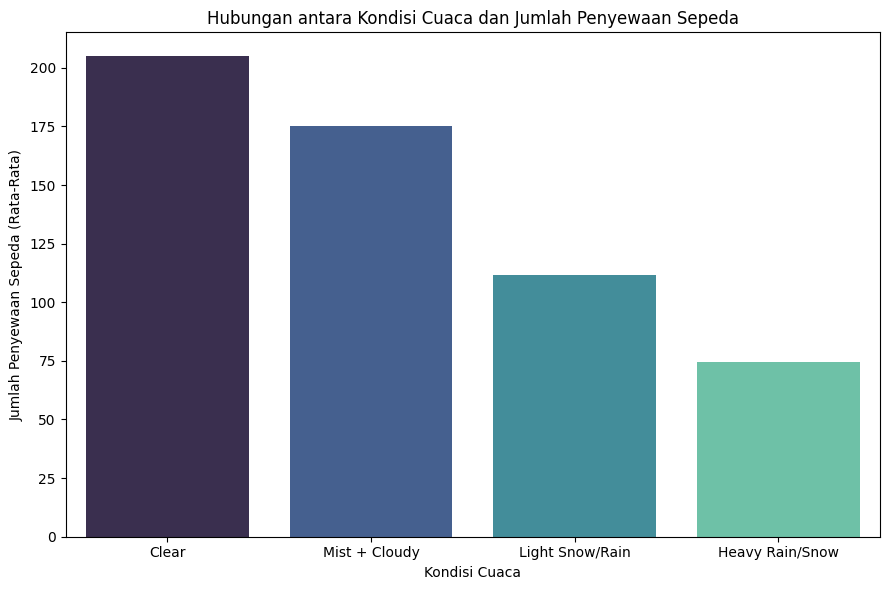

In [22]:
# Membuat bar chart untuk perbandingan jumlah peminjaman sepeda pada tiap kondisi cuaca tertentu
plt.figure(figsize=(9,6))

# Memilih palette warna bar
sns.set_palette("viridis")

# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata - rata jumlah peminjaman sepeda
all_weather = all_df.groupby('weathersit_x')['cnt_x'].mean().reset_index()

# Plot bar chart yang akan ditampilkan
sns.barplot(x=all_weather['weathersit_x'], y=all_weather['cnt_x'],palette="mako")

# Menambahkan judul dan label pada tiap sumbu
plt.title("Hubungan antara Kondisi Cuaca dan Jumlah Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda (Rata-Rata)")

# Mengganti label sumbu x dengan kondisi cuaca
weather_conditions = ['Clear', 'Mist + Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow']
plt.xticks(ticks=range(4), labels=weather_conditions)

# Menampilkan plot chart
plt.tight_layout()
plt.show()

## Keterangan Jawaban Pertanyaan No.1

Berdasarkan grafik di atas, terdapat perbedaan antara jumlah penggunaan sepedan dengan kondisi cuaca tertentu. Puncak tertinggi adalah pada kondisi Clear atau Cuaca Cerah yang tentunya akan semakin banyak pengguna.

#### 2. Bagaimana perbandingan penyewaan sepeda antara hari kerja dan hari libur dalam setahun ?

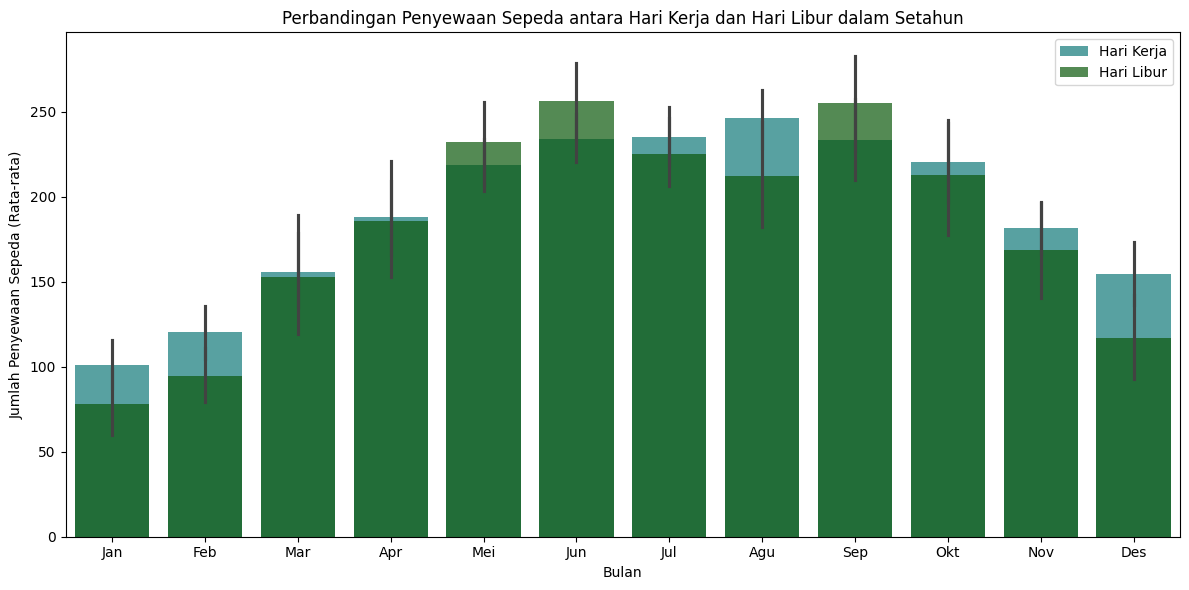

In [23]:

plt.figure(figsize=(12, 6))

sns.set_palette("Dark2")

all_days = all_df.groupby(['dteday', 'workingday_x'])['cnt_x'].mean().reset_index()
work_day = all_days[all_days['workingday_x'] == 1]
holliday = all_days[all_days['workingday_x'] == 0]

sns.barplot(x=work_day['dteday'].dt.month, y=work_day['cnt_x'], color='darkcyan', alpha=0.7, label='Hari Kerja')

sns.barplot(x=holliday['dteday'].dt.month, y=holliday['cnt_x'], color='darkgreen', alpha=0.7, label='Hari Libur')

plt.title('Perbandingan Penyewaan Sepeda antara Hari Kerja dan Hari Libur dalam Setahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda (Rata-rata)')
plt.legend()

month = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"]
plt.xticks(ticks=range(12), labels=month)

plt.tight_layout()
plt.show()

## Keterangan Jawaban Pertanyaan No.2

Grafik histogram diatas menunjukkan perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur tiap bulannya. Nampak bahwa jumlah penyewaan tiap bulannya antara hari libur dan hari kerja tidak jauh berbeda . Namun perlu diingat bahwa dalam sebulan jumlah hari kerja lebih banyak dari hari libur . Perbedaan total hari kerja dengan hari libur dalam sebulan mungkin 3:1 

#### 3. Apakah terdapat perbedaan dalam pola penggunaan sepeda antara casual users dan registered dalam sehari ?

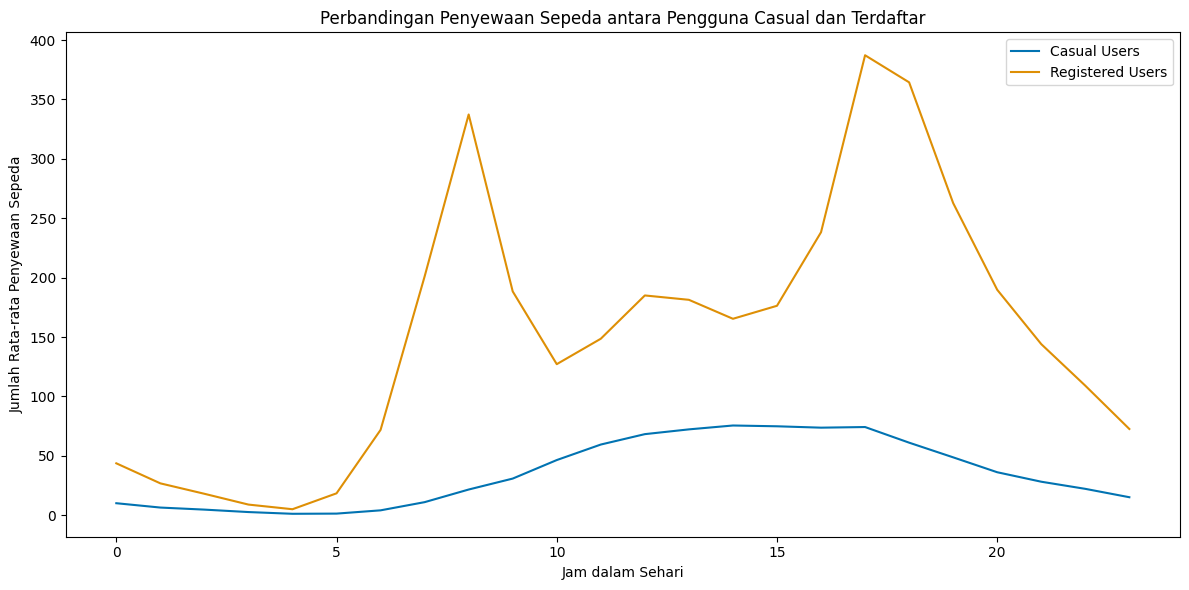

In [24]:
plt.figure(figsize=(12, 6))

sns.set_palette("colorblind")

days_hour = all_df.groupby('hr').mean().reset_index()

sns.lineplot(x='hr', y='casual_x', data=days_hour, label='Casual Users')
sns.lineplot(x='hr', y='registered_x', data=days_hour, label='Registered Users')

plt.title('Perbandingan Penyewaan Sepeda antara Pengguna Casual dan Terdaftar')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Rata-rata Penyewaan Sepeda')

plt.legend()

plt.tight_layout()
plt.show()

## Keterangan Jawaban Pertanyaan No.3

Grafik diatas memperlihatkan perbandingan jumlah user casual dan user registered dalam satu hari. Kita bisa lihat perbandingan yang jauh antara total jumlah user registered dengan user casual. Hal ini bisa dilihat perbandingan dalam jam jam kerja antara user register dan user casual bisa sangat jauh. Puncak perbedaan nya adalah di sekitar jam 17.00 dimana user register yang menyewa sepeda saat itu rerata berjumlah kurang lebih 400 user sedangkan user casual hanya berjumlah kurang lebih 50 user . Perbedaannya adalah user registered lebih banyak 8x lipat dibanding user casual.

## **Conclusion**

- ### 1. Dapat disimpulkan bahwa kondisi cuaca memiliki korelasi dengan jumlah penyewaan sepeda karena tentunya pengguna akan menyewa sepeda dengan kondisi cuaca yang cerah atau tidak ekstrim. Sehingga kondisi cuaca sangat berpengaruh terhadap banyaknya penyewaan sepeda.

- ### 2. Dengan perbandingan  jumlah penyewaan sepeda yang tidak terlalu jauh tiap bulan namun perbandingan total kerja dan hari libur dalam sebulan yang cukup jauh, maka dapat kita simpulkan bahwa penyewaan sepeda di hari libur lebih banyak dibandingkan di hari kerja .

- ### 3.  Dapat saya simpulkan bahwa fluktuasi user casual bersifat stabil tidak banyak banyak bertambah atau berkurang jumlah usernya dalam satu hari . Sedangkan user resgistered sangat berfluktuasi. Dimana pada jam berangkat kerja dan jam pulang kerja akan menjadi puncak user menyewa sepeda dibandingkan jam lainnya .


## RFM

### 1. Requency : Menghitung Seberapa baru pelanggan terakhir kali menyewa sepeda.
### 2. Frequency : Menghitung Berapa kali pelanggan menyewa sepeda dalam periode waktu tertentu.
### 3. Monetary : Jumlah pengeluaran yang dihasilkan dari setiap pelanggan.


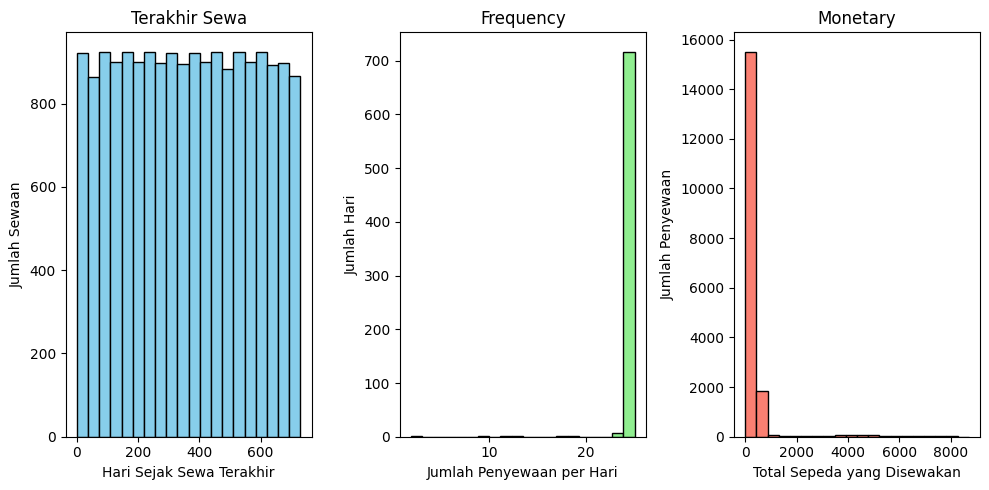

In [25]:
# Menggabungkan kedua dataset
data = pd.concat([data['hour'], data['day']], ignore_index=True)

# Menghitung recency (seberapa baru pelanggan terakhir kali menyewa sepeda)
recent_dates = pd.to_datetime(data['dteday']).max()
data['dteday'] = pd.to_datetime(data['dteday'])
data['recency'] = (recent_dates - data['dteday']).dt.days

# Menghitung frequency (berapa kali pelanggan menyewa sepeda)
data_frequency = data.groupby('dteday').size().reset_index(name='frequency')

# Menghitung monetary (total penyewaan sepeda)
data['monetary'] = data['cnt']

# Membuat bar chart untuk recency
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(data['recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Terakhir Sewa')
plt.xlabel('Hari Sejak Sewa Terakhir')
plt.ylabel('Jumlah Sewaan')

# Membuat bar chart untuk frequency
plt.subplot(1, 3, 2)
plt.hist(data_frequency['frequency'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Frequency')
plt.xlabel('Jumlah Penyewaan per Hari')
plt.ylabel('Jumlah Hari')

# Membuat bar chart untuk monetary
plt.subplot(1, 3, 3)
plt.hist(data['monetary'], bins=20, color='salmon', edgecolor='black')
plt.title('Monetary')
plt.xlabel('Total Sepeda yang Disewakan')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

In [26]:
all_df.to_csv("all_data.csv", index=False)